# Pharmacy Department - Predictive Analysis

Analyzing through various concepts of forecasting for No. of TTOs

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../Data/Pharmacy Dept/Data Cleaning/Merged_Pharmacy_Dept_CLEANED.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,5,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Date,Ward,Room,Case Number,DateTime TTO Received,DateTime (Meds Sent Down),DateTime TTO Checked,DateTime (Counselled),Remarks,Checked By (Pharmacist),...,Room Number,DateTime (Dispensing),DateTime (in Pharmacy),DateTime (in Pigeon),DateTime (Dispensed by Nurses),DateTime (Passed to Nurse),Time Taken (Nurse to Dispense),Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins)
0,2021-01-04,4A,4811.0,3021000132.0,2021-01-04 09:52:00,NaN,2021-01-04 10:00:00,2021-01-04 10:10:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04,3A,3828.0,3020041950.0,2021-01-04 08:34:00,NaN,2021-01-04 08:44:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,3B,3606.0,3021000166.0,2021-01-04 09:15:00,2021-01-04 09:40:00,2021-01-04 09:50:00,2021-01-04 09:55:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,DAY,2011.0,3021000242.0,2021-01-04 10:09:00,NaN,2021-01-04 10:20:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,4B,4610.0,3020044361.0,2021-01-04 08:37:00,NaN,2021-01-04 08:47:00,NaN,PATIENT FOR HOME ON WED,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33197,2021-12-31 00:00:00,824,NaN,4021107656,2021-12-31 13:00:00,NaN,2021-12-31 13:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,add on TTO,0:00,0:10
33198,2021-12-31 00:00:00,1205,NaN,4021107518,2021-12-31 13:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PBH,0:12
33199,2021-12-31 00:00:00,1131,NaN,4021107644,2021-12-31 14:08:00,NaN,2021-12-31 14:17:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:09,0:26
33200,2021-12-31 00:00:00,622,NaN,4021108689,2021-12-31 13:59:00,NaN,2021-12-31 14:09:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1431 pt in bathroom,0:10,0:42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33202 entries, 0 to 33201
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Date                                                33202 non-null  object 
 1   Ward                                                30866 non-null  object 
 2   Room                                                3734 non-null   object 
 3   Case Number                                         33202 non-null  object 
 4   DateTime TTO Received                               33169 non-null  object 
 5   DateTime (Meds Sent Down)                           318 non-null    object 
 6   DateTime TTO Checked                                29022 non-null  object 
 7   DateTime (Counselled)                               1383 non-null   object 
 8   Remarks                                             2992 non-null   object 


In [5]:
#change datetime data format 
df[['Date']] = df[['Date']].apply(pd.to_datetime)

## Create df with daily number of TTO 

In [6]:
daily_no_tto_df = df.groupby(['Date']).size().reset_index(name='TTO Count')
#daily_no_tto_df = df.groupby(['Date', 'Hospital']).size().reset_index(name='TTO Count')
daily_no_tto_df

,Date,TTO Count
0,2021-01-01,42
1,2021-01-02,49
2,2021-01-03,34
3,2021-01-04,69
4,2021-01-05,14
...,...,...
380,2022-01-22,60
381,2022-01-23,76
382,2022-01-24,72
383,2022-01-25,74


In [7]:
daily_no_tto_hosp_df = df.groupby(['Date', 'Hospital']).size().reset_index(name='TTO Count')
daily_no_tto_hosp_df

,Date,Hospital,TTO Count
0,2021-01-01,MNH,42
1,2021-01-02,MNH,49
2,2021-01-03,MNH,34
3,2021-01-04,MNH,61
4,2021-01-04,PEH,8
...,...,...,...
1114,2022-01-22,MEH,60
1115,2022-01-23,MEH,76
1116,2022-01-24,MEH,72
1117,2022-01-25,MEH,74


In [8]:
#Check info
daily_no_tto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       385 non-null    datetime64[ns]
 1   TTO Count  385 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB


In [9]:
#test to fix SARIMA
daily_no_tto_df = daily_no_tto_df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [10]:
daily_no_tto_df

,Date,TTO Count
0,2021-01-01,42
1,2021-01-02,49
2,2021-01-03,34
3,2021-01-04,69
4,2021-01-05,14
...,...,...
380,2022-01-22,60
381,2022-01-23,76
382,2022-01-24,72
383,2022-01-25,74


In [11]:
#Change 'Date' column to datetime
daily_no_tto_df['Date'] = pd.to_datetime(daily_no_tto_df['Date'], infer_datetime_format=True)
#Set as index
daily_no_tto_df = daily_no_tto_df.set_index('Date')

daily_no_tto_df

,TTO Count
Date,
2021-01-01,42
2021-01-02,49
2021-01-03,34
2021-01-04,69
2021-01-05,14
...,...
2022-01-22,60
2022-01-23,76
2022-01-24,72


In [12]:
# exclude jan 2022 data since it is from MEH only 
daily_no_tto_df = daily_no_tto_df['2021-01-01':'2021-12-31'].resample('W').sum()
daily_no_tto_df.head()

,TTO Count
Date,
2021-01-03,125
2021-01-10,170
2021-01-17,298
2021-01-24,368
2021-01-31,373


## Check for Common Time Series Patterns

In [13]:
import warnings
import matplotlib.pyplot as plt

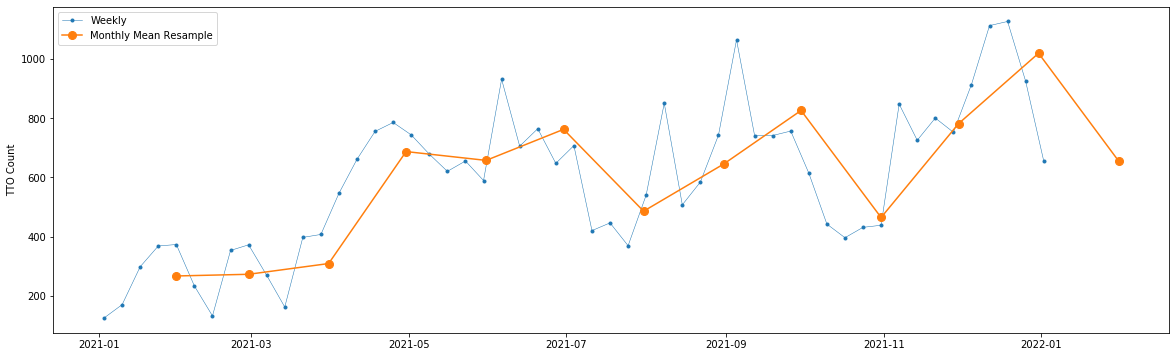

In [14]:
#Visualize the Data
y = daily_no_tto_df['TTO Count']
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(y, marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(), marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('TTO Count')
ax.legend()

## Decompose Data

In [15]:
import statsmodels.api as sm

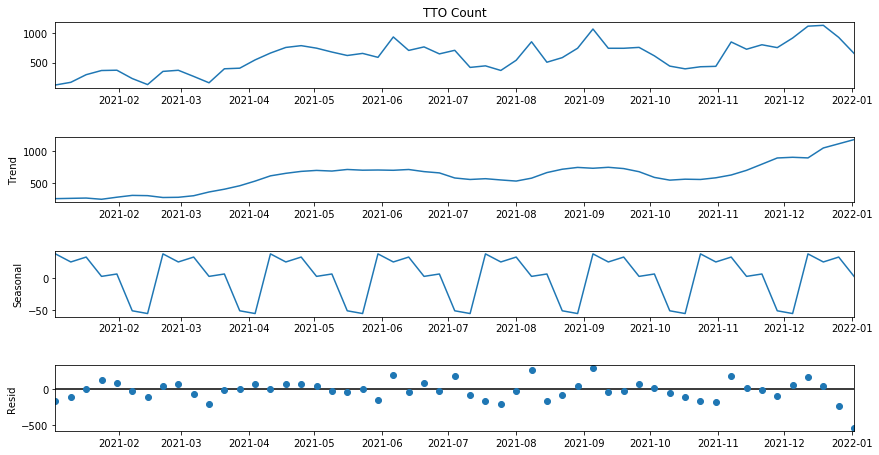

In [16]:
#graphs to show seasonal_decompose 
#max period is round down(53/2) 
def seasonal_decompose(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=7)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(y)

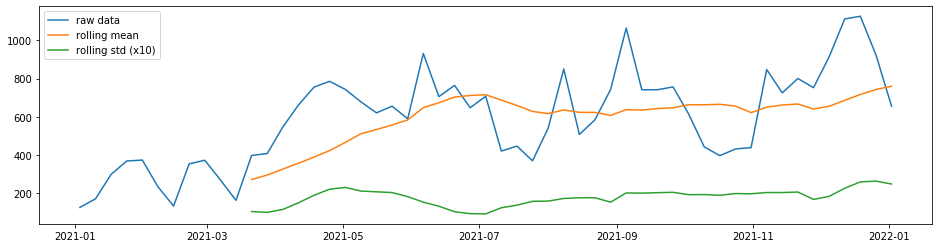

In [17]:
#plot for Rolling Statistic to test Stationarity
def test_stationarity(timeseries, title):

    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean')
    ax.plot(rolstd, label='rolling std (x10)')
    ax.legend()
    
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

## Augmented Dickey-Fuller Test

statistical test used to test whether a given Time series is stationary or not

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
#Augmented Dickey-Fuller Test
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [20]:
ADF_test(y, 'raw data')

 > Is the raw data stationary ?
Test statistic = -2.942
P-value = 0.041
Critical values :
	1%: -3.562878534649522 - The data is not stationary with 99% confidence
	5%: -2.918973284023669 - The data is  stationary with 95% confidence
	10%: -2.597393446745562 - The data is  stationary with 90% confidence


## Make the data stationary 

 > Is the de-trended data stationary ?
Test statistic = -2.907
P-value = 0.045
Critical values :
	1%: -3.60098336718852 - The data is not stationary with 99% confidence
	5%: -2.9351348158036012 - The data is not stationary with 95% confidence
	10%: -2.6059629803688282 - The data is  stationary with 90% confidence


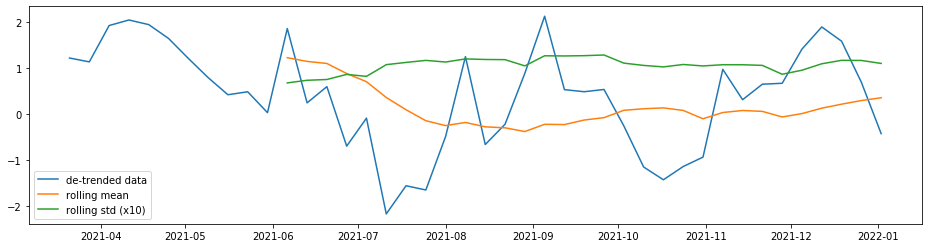

In [21]:
#detrend
y_detrend = (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

 > Is the 12 lag differenced data stationary ?
Test statistic = -3.412
P-value = 0.011
Critical values :
	1%: -3.6055648906249997 - The data is not stationary with 99% confidence
	5%: -2.937069375 - The data is  stationary with 95% confidence
	10%: -2.606985625 - The data is  stationary with 90% confidence


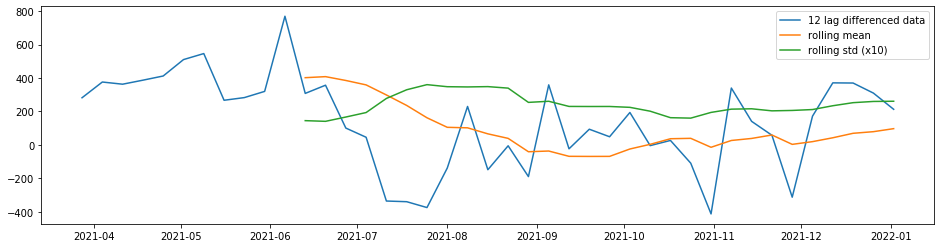

In [22]:
#differencing
y_12lag = y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [23]:
#set y_to_train, y_to_test, and the length of predict units
y_to_train = y[:'2021-06-30'] #dataset to train
y_to_test = y['2021-07-01':] #last X months for test

predict_date = len(y) - len(y[:'2021-06-30']) # the number of data points for the test set

## Simple Exponential Smoothing

In [24]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 218.82
The Root Mean Squared Error of our forecasts with auto optimization is 218.45


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


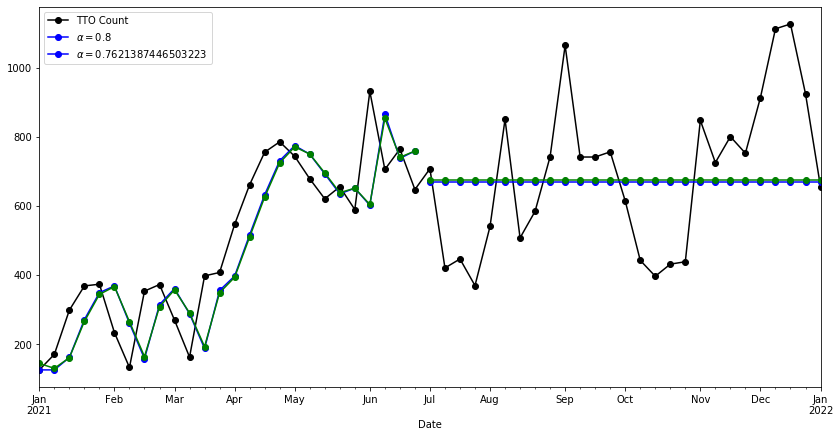

In [25]:
def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()
    
ses(y, y_to_train,y_to_test,0.8,predict_date)

Interpretation:
 shows the difference between the specified α (blue line) and the auto-optimized α (green line). As you can see from the graph, SES will predict a flat, forecasted line since the logic behind it uses weighted averages. 

## Holt's Linear Trend Method

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

The Root Mean Squared Error of Holts Linear trend 217.68
The Root Mean Squared Error of Holts Exponential trend 244.55


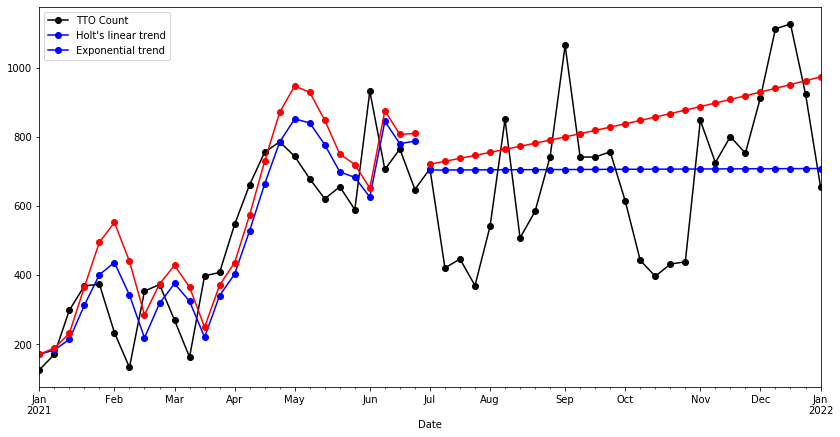

In [26]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()
    
holt(y, y_to_train,y_to_test,0.6,0.2,predict_date)

## SARIMA

In [27]:
import itertools

In [28]:
#sarima 
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

sarima_grid_search(y,12)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

The set of parameters with the minimum AIC is: SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:369.38027935615213


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The grid search tested all possible combinations of variables, and printed out the set that resulted in the lowest AIC, and we can see that SARIMA(1, 1, 0)x(1, 1, 0, 12) has the lowest AIC value.

In [29]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0634      0.274      0.232      0.817      -0.473       0.600
ar.S.L12      -0.8393      0.178     -4.717      0.000      -1.188      -0.491
sigma2      4.097e+04   1.44e+04      2.851      0.004    1.28e+04    6.91e+04


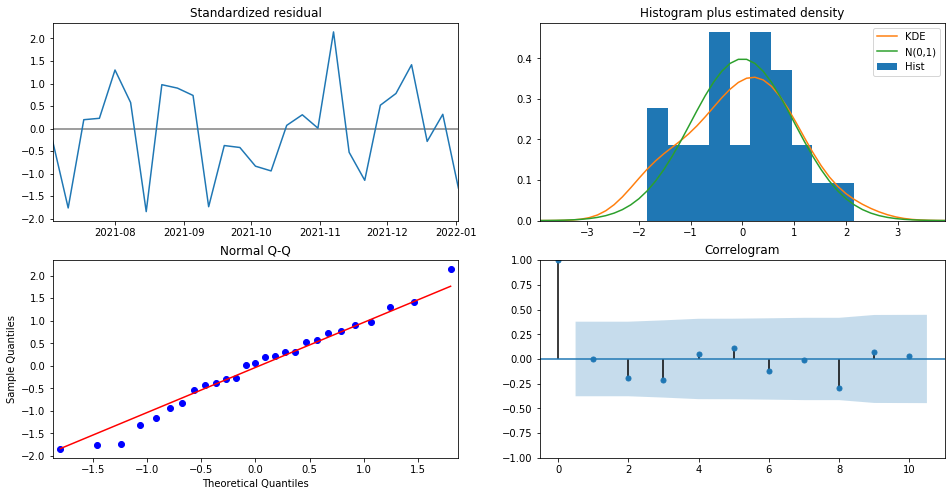

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 202.42


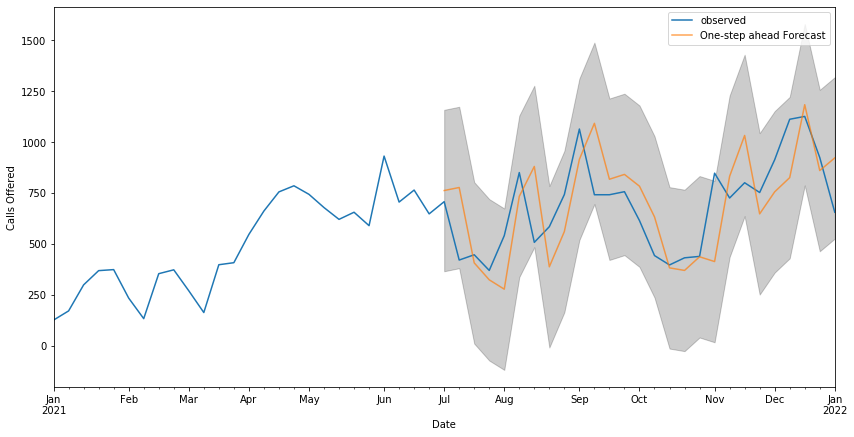

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 395.3


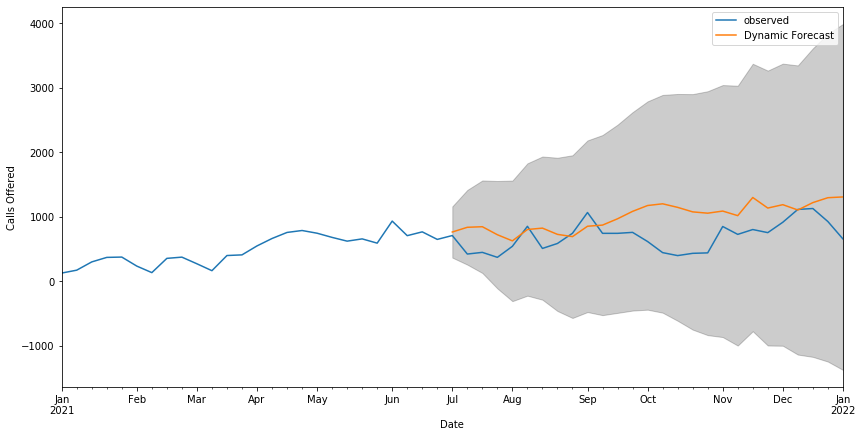

In [30]:
model = sarima_eva(y,(1,1,0),(1,1,0,12),12,'2021-07-04',y_to_test)

In [31]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

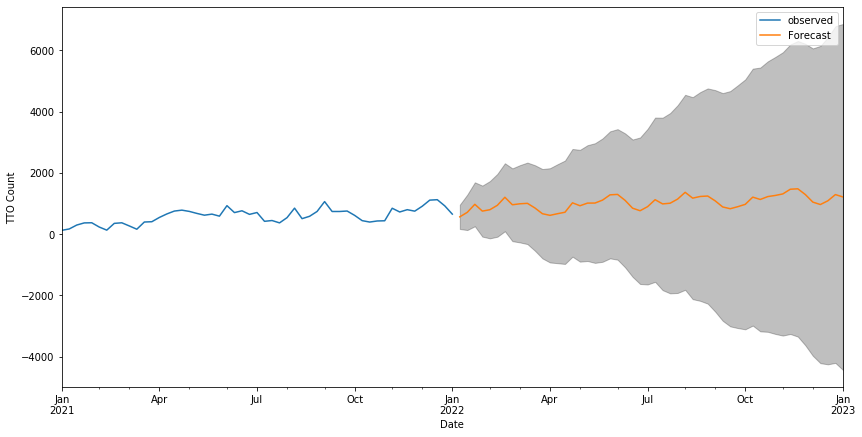

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-09,566.28515483,169.55611519,963.01419447
1,2022-01-16,714.36985943,135.23930996,1293.50040889
2,2022-01-23,975.60873407,258.15463791,1693.06283023
3,2022-01-30,753.45539366,-79.71588589,1586.62667320
4,2022-02-06,798.47462624,-136.19848612,1733.14773859


In [32]:
final_table = forecast(model,52,y)
final_table.head()

In [33]:
final_table

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-09,566.28515483,169.55611519,963.01419447
1,2022-01-16,714.36985943,135.23930996,1293.50040889
2,2022-01-23,975.60873407,258.15463791,1693.06283023
3,2022-01-30,753.45539366,-79.71588589,1586.62667320
4,2022-02-06,798.47462624,-136.19848612,1733.14773859
5,2022-02-13,943.13600985,-83.04799816,1969.32001787
6,2022-02-20,1205.67478331,95.49757603,2315.85199059
7,2022-02-27,960.45649438,-227.79147899,2148.70446774
8,2022-03-06,992.43699130,-269.05936658,2253.93334919
9,2022-03-13,1007.27628529,-323.44264660,2337.99521718


## Evaluating SARIMA with MAPE

For each predicted data point, the absolute difference from the corresponding test point was calculated, and then divided by the test point. The average percentage gives the MAPE.

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1206      0.197     -0.614      0.540      -0.506       0.265
ar.S.L12      -0.6646      0.166     -4.013      0.000      -0.989      -0.340
sigma2      3.663e+04   1.11e+04      3.312      0.001     1.5e+04    5.83e+04


Date
2021-07-04    793.97462867
2021-07-11    792.72361821
2021-07-18    477.40207614
2021-07-25    337.35063794
2021-08-01    276.44252329
2021-08-08    636.07567097
2021-08-15    852.35152429
2021-08-22    460.70650183
2021-08-29    607.39843609
2021-09-05    808.57589472
2021-09-12   1061.30082802
2021-09-19    836.26496815
2021-09-26    843.95800946
2021-10-03    732.03633978
2021-10-10    655.70504984
2021-10-17    412.45479498
2021-10-24    409.22701767
2021-10-31    493.92356196
2021-11-07    353.25545479
2021-11-14    768.58220361
2021-11-21   1017.81764927
2021-11-28    782.56496869
2021-12-05    683.56859750
2021-12-12    807.49617338
2021-12-19   1123.53571251
2021-12-26    891.36312404
2022-01-02    879.20131132
Freq: W-SUN, dtype: float64

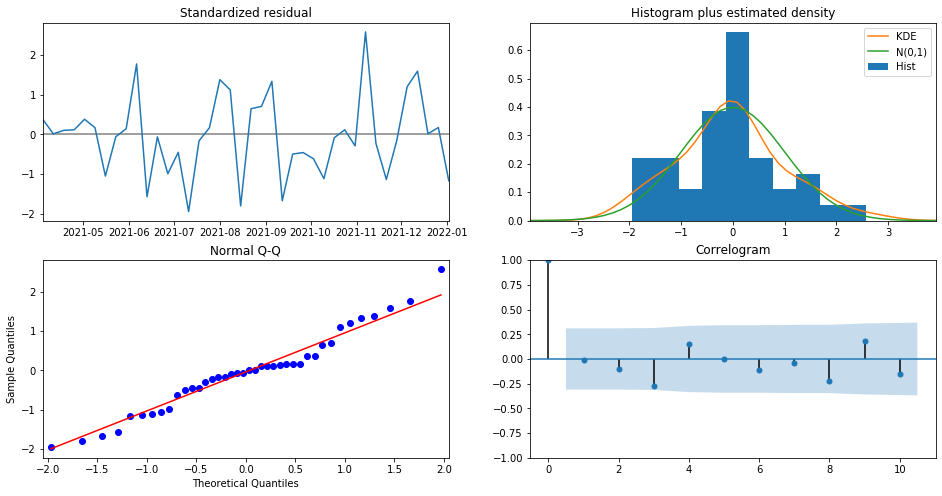

In [34]:
mod = sm.tsa.statespace.SARIMAX(y,order = (1,1,0), 
                                seasonal_order= (1,1,0,12),
                                seasonal_period= 12)
results = mod.fit()
print(results.summary().tables[1])
    
results.plot_diagnostics(figsize=(16, 8))
#plt.show()

    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
pred = results.get_prediction(start=pd.to_datetime('2021-07-04'), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_forecasted



In [35]:
from statsmodels.tsa.stattools import acf

In [36]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # mean absolute percentage error
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # mean absolute error
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # root mean square
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-y_to_test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(y_forecasted, y_to_test.values)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.24643239266201053,
 'me': 5.676195449287939,
 'mae': 161.75058472868352,
 'mpe': 0.04982590532971381,
 'rmse': 206.84306251192115,
 'acf1': 0.05305733660142904,
 'corr': 0.5627328828223457,
 'minmax': 0.2011056561000416}

 Around 2.246% MAPE implies the model is about 97.754% accurate in predicting the next 28 observations.

## ARIMA

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

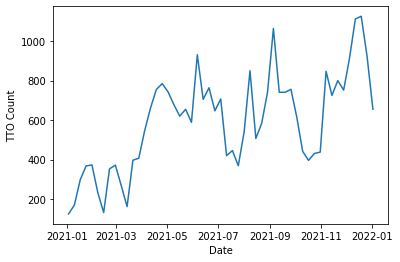

In [38]:
daily_no_tto_df.head()

plt.xlabel('Date')
plt.ylabel('TTO Count')
plt.plot(daily_no_tto_df)

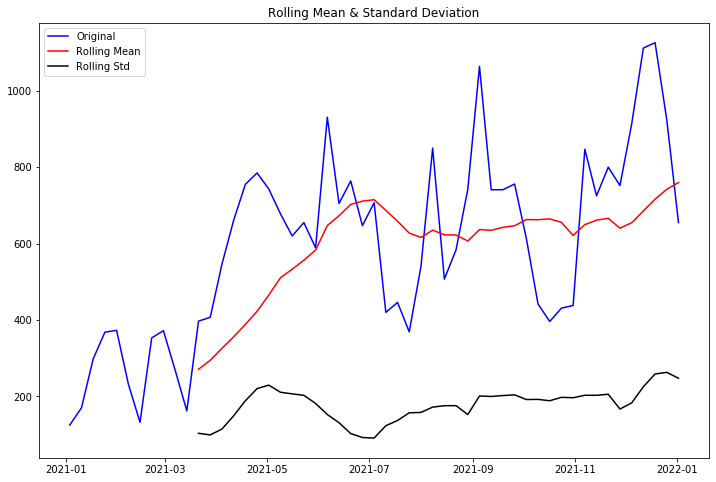

Results of Dickey-Fuller Test:
p-value = 0.2549178194. The series is likely non-stationary.
Test Statistic                -2.07443513
p-value                        0.25491782
#Lags Used                     9.00000000
Number of Observations Used   43.00000000
Critical Value (1%)           -3.59250423
Critical Value (5%)           -2.93154977
Critical Value (10%)          -2.60406594
dtype: float64


In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.10f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.10f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
    
test_stationarity(daily_no_tto_df['TTO Count'])

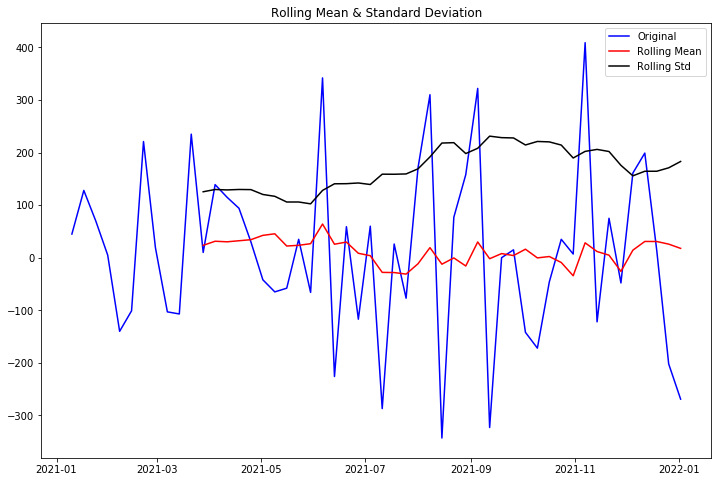

Results of Dickey-Fuller Test:
p-value = 0.0000000000. The series is likely stationary.
Test Statistic                -8.02318293
p-value                        0.00000000
#Lags Used                     0.00000000
Number of Observations Used   51.00000000
Critical Value (1%)           -3.56562405
Critical Value (5%)           -2.92014223
Critical Value (10%)          -2.59801468
dtype: float64


In [51]:
first_diff = daily_no_tto_df['TTO Count'] - daily_no_tto_df['TTO Count'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


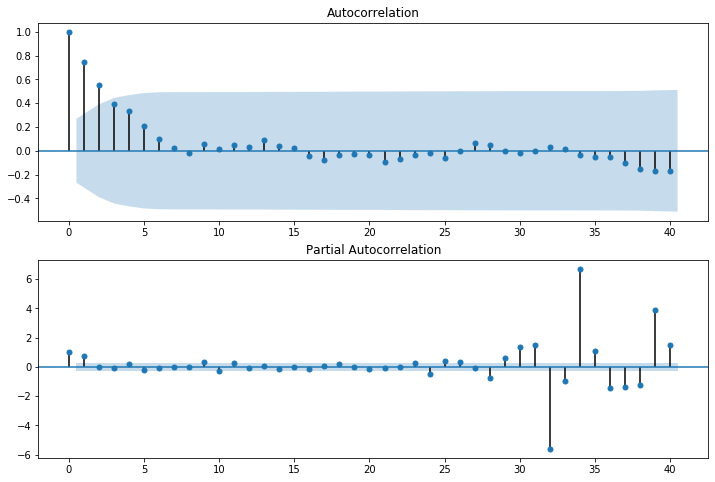

In [52]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_no_tto_df['TTO Count'], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_no_tto_df['TTO Count'], lags=40, ax=ax2)# , lags=40

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


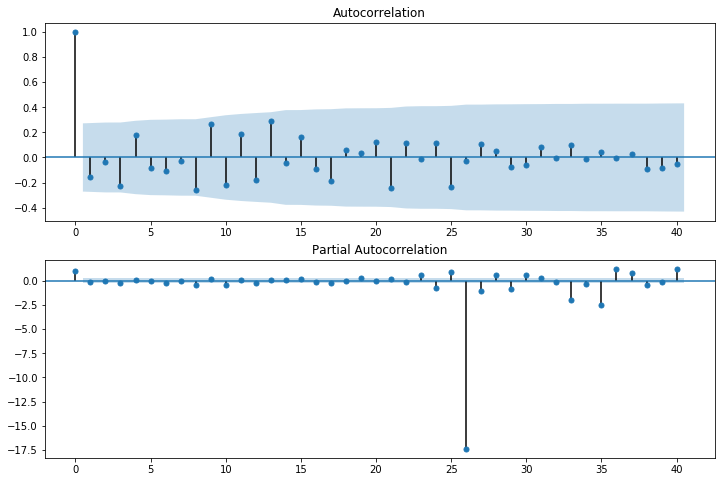

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)